In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Variation of g with Altitude

Analyze the variation of the acceleration due to gravity with altitude.

#

## Initial Observations

The value of g decreases as altitude increases, which is expected as the force of gravity is inversely proportional to the square of the distance between two objects. At first glance, it looks as though g decreases linearly, though the points are not evenly spread out. Over half of the points are between 0 and 10000 meters, and appear to spread out as the altitude increases. Is this due to the researchers inability to take a lot of data at high altitudes, or due to the mathematical relationship between g and altitude? Since g seems to change by roughly the same amount each 10000 meters (about 0.03 m/s^2), it seems the decrease in data as altitude increases seems to be due to the researcher's. The rate of change of g does not appear to be increasing as altitude increases.

Since there is more data for lower altitude values than for higher altitude values, the uncertainty for each data point may be increasing as altitude increases.

Theory states that the acceleration due to the gravity of the earth can be calculated using the gravitational constant, the mass of the earth, and the distance from the center of the earth:

g = (G * m_earth) / r_earth^2

This means that g should be inversely proportional to the square of the altitude. 

In [20]:
# get the data from the file
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))

Text(0, 0.5, 'Acceleration Due to Gravity (m/s^2)')

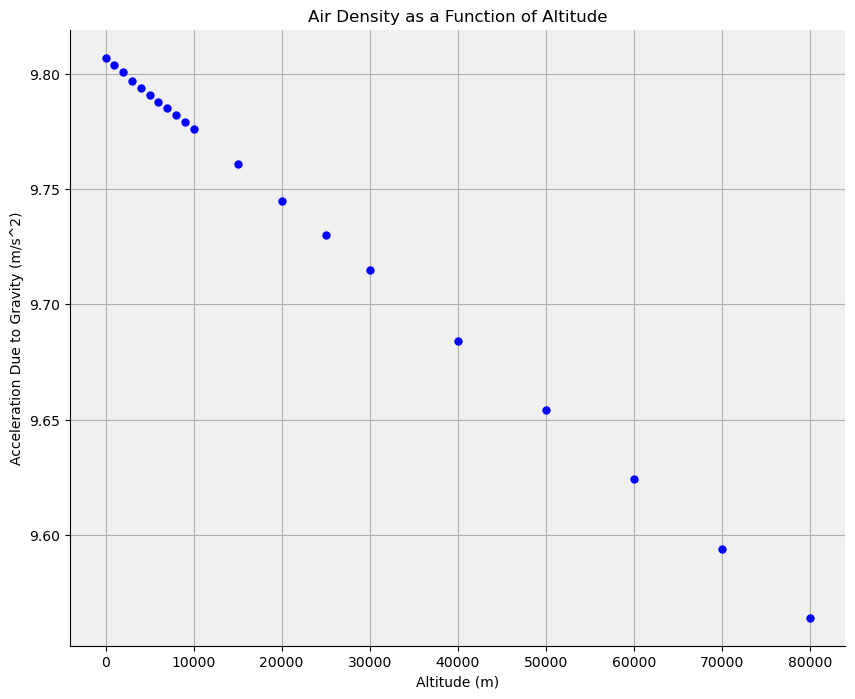

In [21]:
# plot gravity and altitude
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))
# Set the grid lines
ax.grid(True)
# Set the background color
ax.set_facecolor('#F0F0F0')
# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Acceleration Due to Gravity (m/s^2)")
# plt.yscale("log")

In [22]:
# for i in range(len(gravity)):
#     print("altitude:", altitude[i], "gravity:", gravity[i])

alt_vals = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
val_1 = gravity[0]
diff = []
for i in range(len(gravity)):
    if altitude[i] in alt_vals:
        print("altitude:", altitude[i], "gravity:", gravity[i])
        diff.append(val_1 - gravity[i])
        val_1 = gravity[i]

print(["{0:.4f}".format(i) for i in diff])

altitude: 0.0 gravity: 9.807
altitude: 10000.0 gravity: 9.776
altitude: 20000.0 gravity: 9.745
altitude: 30000.0 gravity: 9.715
altitude: 40000.0 gravity: 9.684
altitude: 50000.0 gravity: 9.654
altitude: 60000.0 gravity: 9.624
altitude: 70000.0 gravity: 9.594
altitude: 80000.0 gravity: 9.564
['0.0000', '0.0310', '0.0310', '0.0300', '0.0310', '0.0300', '0.0300', '0.0300', '0.0300']


In [34]:
def theoretical_altitude_function(y):
    """
    This function calculates the acceleration due to gravity for a given altitude value.
    It assumes that the radius of the earth is 6371 km (a value obtained from Wikipedia),
    and that the distance between the center of the earth and zero altitude is equal to
    that radius. The values for the gravitational constant and the mass of the earth have
    also been obtained from Wikipedia.
    
    :param y: the altitude in meters
    :return: the acceleration due to gravity at the given altitude
    """
    
    # grav_constant = 6.674 * 10^-11  N m^2 kg^-2
    # m_earth = 5.9722 * 10^24 kg
    tot_dist = 6371000 + y
    
    numerator = 6.674 * 5.9722 * np.power(10, 13)
    denominator = tot_dist * tot_dist
    
    return numerator / denominator

Text(0, 0.5, 'Acceleration Due to Gravity (m/s^2)')

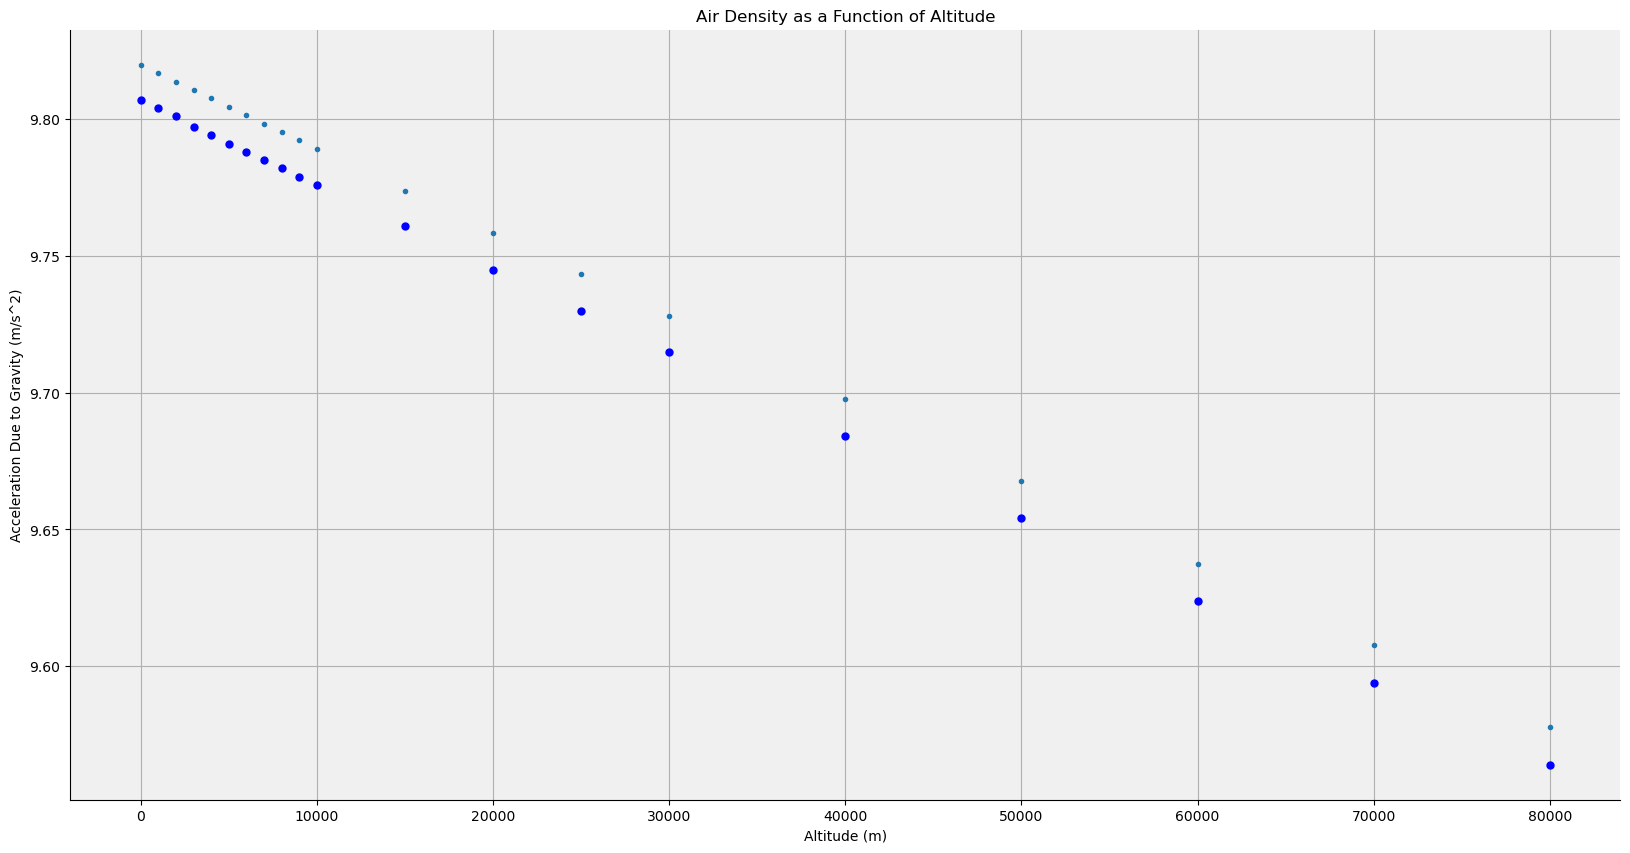

In [35]:
# plot experimental and theoretical data on same graph
theo_g = []
for alt_val in altitude:
    theo_g.append(theoretical_altitude_function(alt_val))
# print(theo_g)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(True)
ax.set_facecolor('#F0F0F0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
plt.plot(altitude, theo_g, ".")

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Acceleration Due to Gravity (m/s^2)")
# plt.yscale("log")

In [36]:
def altitude_fit_function(y, k, r):
    return k / ((r+y)*(r+y))

# based on theory, I expect k to be equal to ~3.986 * 10^14 and r to be equal to ~6.371 * 10^6
initial_param_vals = [3.986*np.power(10, 14), 6371000]

popt, pcov = curve_fit(altitude_fit_function, altitude, gravity, p0=initial_param_vals)

# optimal values for parameters
print(popt)
# covariance matrix for popt
print(pcov)

[3.94987136e+14 6.34642602e+06]
[[4.57570739e+23 3.68856677e+15]
 [3.68856677e+15 2.97346699e+07]]


In [37]:
# because the data looks linear at first glance, I want to try a linear fit
def linear_fit_function(y, m, b):
    return (m*y) + b

popt, pcov = curve_fit(linear_fit_function, altitude, gravity)

# optimal values for parameters
print(popt)
# covariance matrix for popt
print(pcov)

[-3.03863758e-06  9.80635969e+00]
[[ 1.73461146e-17 -3.85951110e-13]
 [-3.85951110e-13  1.86774295e-08]]
